In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate KNN with different distance measures
def knn_with_distance(distance_metric, p_value=None):
    if p_value:
        knn = KNeighborsClassifier(n_neighbors=5, metric=distance_metric, p=p_value)
    else:
        knn = KNeighborsClassifier(n_neighbors=5, metric=distance_metric)
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Compute accuracy for different distance measures
knn_results = {
    'Euclidean': knn_with_distance('euclidean'),
    'Manhattan': knn_with_distance('manhattan'),
    'Minkowski (p=3)': knn_with_distance('minkowski', p_value=3)  # Using p=3 for a generalized Minkowski distance
}

# Convert results into a DataFrame
knn_comparison = pd.DataFrame(list(knn_results.items()), columns=['Distance Metric', 'Accuracy'])

# Print comparison
print(knn_comparison)

   Distance Metric  Accuracy
0        Euclidean  1.000000
1        Manhattan  1.000000
2  Minkowski (p=3)  0.966667


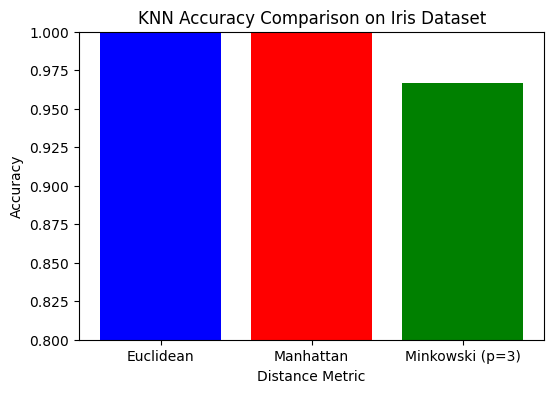

In [4]:
plt.figure(figsize=(6, 4))
plt.bar(knn_comparison["Distance Metric"], knn_comparison["Accuracy"], color=["blue", "red", "green"])
plt.ylim(0.8, 1)  # Adjusting y-axis for better visualization
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy Comparison on Iris Dataset")
plt.show()

In [5]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
